# <font color='pink'>Backlog 10 - Criação de perguntas com base nos dados</font>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MICRODADOS_SUPERIOR.csv', sep = ',')

In [3]:
df.dropna(subset=['QT_DOC_EX_BRANCA'], inplace=True)
df

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,...,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA
2828,7,2010,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Barra do Garças,5101803.0,0.0,...,163.0,586.0,39.0,217.0,75.0,0.0,857.0,1762.0,32.0,6.0
2829,48,2010,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Cuiabá,5103403.0,1.0,...,163.0,586.0,39.0,217.0,75.0,0.0,857.0,1762.0,32.0,6.0
2830,49,2010,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Cuiabá,5103403.0,1.0,...,163.0,586.0,39.0,217.0,75.0,0.0,857.0,1762.0,32.0,6.0
2831,286,2010,Centro-Oeste,5.0,Distrito Federal,DF,53.0,Brasília,5300108.0,1.0,...,265.0,654.0,18.0,96.0,15.0,0.0,14.0,1973.0,136.0,6.0
2832,287,2010,Centro-Oeste,5.0,Distrito Federal,DF,53.0,Brasília,5300108.0,1.0,...,265.0,654.0,18.0,96.0,15.0,0.0,14.0,1973.0,136.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93355,335490,2020,Sudeste,3.0,Rio de Janeiro,RJ,33.0,Barra Mansa,3300407.0,0.0,...,0.0,14.0,0.0,7.0,0.0,0.0,2.0,23.0,0.0,0.0
93356,335557,2020,Centro-Oeste,5.0,Goiás,GO,52.0,Catalão,5205109.0,0.0,...,11.0,193.0,12.0,63.0,5.0,0.0,67.0,334.0,6.0,0.0
93357,335567,2020,Nordeste,2.0,Pernambuco,PE,26.0,Garanhuns,2606002.0,0.0,...,5.0,7.0,0.0,1.0,0.0,0.0,166.0,174.0,0.0,0.0
93358,335599,2020,Centro-Oeste,5.0,Goiás,GO,52.0,Jataí,5211909.0,0.0,...,10.0,150.0,16.0,57.0,4.0,0.0,154.0,378.0,3.0,1.0


In [4]:
new_df = df[['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA', 'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA']]
new_df

,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA
2828,586.0,39.0,217.0,75.0,0.0
2829,586.0,39.0,217.0,75.0,0.0
2830,586.0,39.0,217.0,75.0,0.0
2831,654.0,18.0,96.0,15.0,0.0
2832,654.0,18.0,96.0,15.0,0.0
...,...,...,...,...,...
93355,14.0,0.0,7.0,0.0,0.0
93356,193.0,12.0,63.0,5.0,0.0
93357,7.0,0.0,1.0,0.0,0.0
93358,150.0,16.0,57.0,4.0,0.0


In [5]:
new_df = df.groupby(['NU_ANO_CENSO', 'SG_UF'])['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA', 'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA'].sum()
print(new_df)

                    QT_DOC_EX_BRANCA  QT_DOC_EX_PRETA  QT_DOC_EX_PARDA  \
NU_ANO_CENSO SG_UF                                                       
2010         AC               5822.0             57.0            387.0   
             AL              11342.0            243.0           1721.0   
             AM              13660.0            544.0          10061.0   
             AP               2749.0             94.0            333.0   
             BA              42891.0           1337.0           6226.0   
...                              ...              ...              ...   
2020         RS            1046586.0          20622.0          88430.0   
             SC             638416.0          13234.0          59596.0   
             SE              74556.0           2231.0          26274.0   
             SP            4816665.0         107210.0         487289.0   
             TO             144467.0           3825.0          19710.0   

                    QT_DOC_EX_AMARELA

C:\Users\beatr\AppData\Local\Temp\ipykernel_9224\536737475.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df = df.groupby(['NU_ANO_CENSO', 'SG_UF'])['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA', 'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA'].sum()


In [6]:
stacked_mat = new_df.stack()
print(stacked_mat.index)

MultiIndex([(2010, 'AC',   'QT_DOC_EX_BRANCA'),
            (2010, 'AC',    'QT_DOC_EX_PRETA'),
            (2010, 'AC',    'QT_DOC_EX_PARDA'),
            (2010, 'AC',  'QT_DOC_EX_AMARELA'),
            (2010, 'AC', 'QT_DOC_EX_INDIGENA'),
            (2010, 'AL',   'QT_DOC_EX_BRANCA'),
            (2010, 'AL',    'QT_DOC_EX_PRETA'),
            (2010, 'AL',    'QT_DOC_EX_PARDA'),
            (2010, 'AL',  'QT_DOC_EX_AMARELA'),
            (2010, 'AL', 'QT_DOC_EX_INDIGENA'),
            ...
            (2020, 'SP',   'QT_DOC_EX_BRANCA'),
            (2020, 'SP',    'QT_DOC_EX_PRETA'),
            (2020, 'SP',    'QT_DOC_EX_PARDA'),
            (2020, 'SP',  'QT_DOC_EX_AMARELA'),
            (2020, 'SP', 'QT_DOC_EX_INDIGENA'),
            (2020, 'TO',   'QT_DOC_EX_BRANCA'),
            (2020, 'TO',    'QT_DOC_EX_PRETA'),
            (2020, 'TO',    'QT_DOC_EX_PARDA'),
            (2020, 'TO',  'QT_DOC_EX_AMARELA'),
            (2020, 'TO', 'QT_DOC_EX_INDIGENA')],
           names=['NU_A

In [7]:
stacked_mat_reset_2020 = stacked_mat[2020].reset_index()
stacked_mat_reset_2020

,SG_UF,level_1,0
0,AC,QT_DOC_EX_BRANCA,80909.0
1,AC,QT_DOC_EX_PRETA,1879.0
2,AC,QT_DOC_EX_PARDA,10767.0
3,AC,QT_DOC_EX_AMARELA,1514.0
4,AC,QT_DOC_EX_INDIGENA,84.0
...,...,...,...
130,TO,QT_DOC_EX_BRANCA,144467.0
131,TO,QT_DOC_EX_PRETA,3825.0
132,TO,QT_DOC_EX_PARDA,19710.0
133,TO,QT_DOC_EX_AMARELA,2907.0


In [8]:
stacked_mat_reset_2020.columns = ['Estados', 'Raça', 'Quant_docentes']
stacked_mat_reset_2020

,Estados,Raça,Quant_docentes
0,AC,QT_DOC_EX_BRANCA,80909.0
1,AC,QT_DOC_EX_PRETA,1879.0
2,AC,QT_DOC_EX_PARDA,10767.0
3,AC,QT_DOC_EX_AMARELA,1514.0
4,AC,QT_DOC_EX_INDIGENA,84.0
...,...,...,...
130,TO,QT_DOC_EX_BRANCA,144467.0
131,TO,QT_DOC_EX_PRETA,3825.0
132,TO,QT_DOC_EX_PARDA,19710.0
133,TO,QT_DOC_EX_AMARELA,2907.0


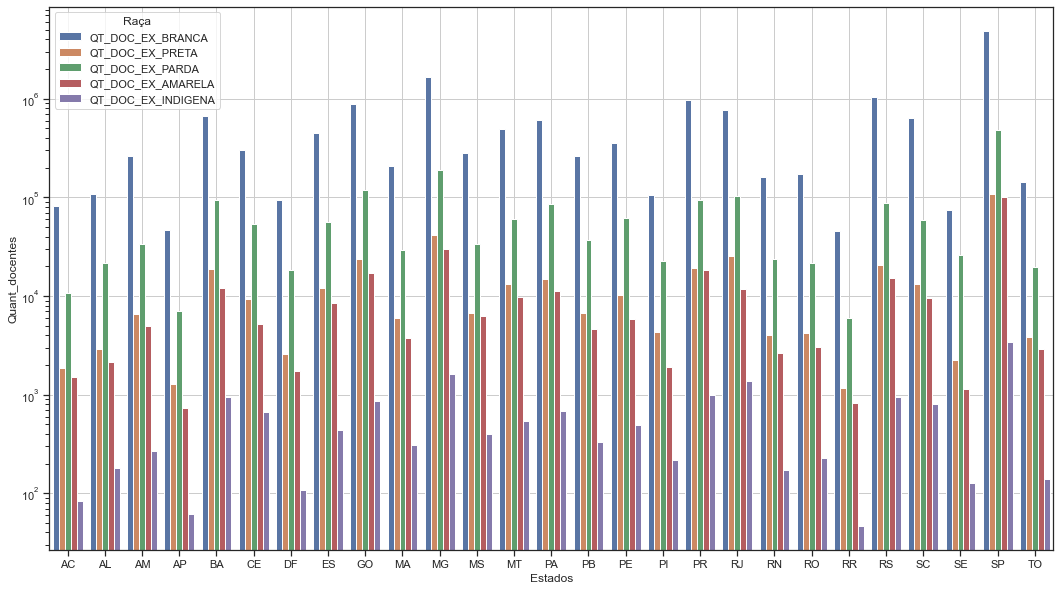

In [9]:
sns.set_theme(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x='Estados', y='Quant_docentes', hue='Raça', ax = ax, data=stacked_mat_reset_2020)
plt.yscale("log")
plt.grid()
plt.show()